### Venn Map

In [1]:
from Bio import SeqIO

def extract_gene_symbol(description):
    parts = description.split(' ')
    for part in parts:
        if part.startswith('gene_symbol:'):
            return part.split(':')[1]
    return None  

fasta_file = "Homocdsall.fasta"  

cds_dic = {}
for record in SeqIO.parse(fasta_file, "fasta"):
    gene_symbol = extract_gene_symbol(record.description)
    cds_dic[gene_symbol] = str(record.seq)

In [2]:
cds = set(cds_dic.keys())
len(cds)

19853

In [3]:
# read excel and create name_alphafold_entry_dic
import pandas as pd
# Load spreadsheet
xl = pd.ExcelFile('human_genename_AFid.xlsx')

# Load a sheet into a DataFrame by name
df = xl.parse(xl.sheet_names[0], skiprows=0)

name_alphafold_entry_dic = {}

for index, row in df.iterrows():
    name_alphafold_entry_dic[row[0]] = row[1]
    
print(len(name_alphafold_entry_dic))

name_entry_dic = {}
from tqdm import tqdm
cds_gene_list = []
for k,v in cds_dic.items():       
        cds_gene_list.append(k)
cds_gene_list = list(set(cds_gene_list))

for i in tqdm(cds_gene_list):
    try:
        
        for k,v in name_alphafold_entry_dic.items():       
            if i in v:
                name_entry_dic[i] = k
    except:
        print(i)

20291


 52%|████████████████████████████▎                         | 10422/19853 [01:20<01:14, 127.01it/s]

None


100%|██████████████████████████████████████████████████████| 19853/19853 [02:33<00:00, 129.06it/s]


In [4]:
# AFDB entries
af = set(name_entry_dic.keys())
len(af)

19575

In [5]:
DD_DU = {}
# Load spreadsheet
xl = pd.ExcelFile('all_cancer_pair.xlsx')

df = xl.parse(xl.sheet_names[0], skiprows=3)

for index, row in df.iterrows():
# Use the first and second column values as a key, and set the value as 1
    DD_DU[row[0], row[1]] = 1

    
df = xl.parse(xl.sheet_names[2], skiprows=2)

for index, row in df.iterrows():
# Use the first and second column values as a key, and set the value as 1
    DD_DU[row[0], row[1]] = 2
    
DD_DU_single_gene_list = []
for k,v in DD_DU.items():
    DD_DU_single_gene_list.append(k[0])
    DD_DU_single_gene_list.append(k[1])

/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
DD_DU = set(DD_DU_single_gene_list)
len(DD_DU)

1998

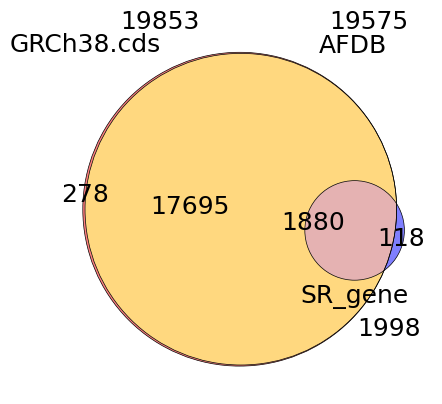

In [8]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Assuming cds, af, DD_DU are your sets

venn = venn3([cds, af, DD_DU], ('GRCh38.cds', 'AFDB', 'SR_gene'), set_colors=('red',
                                                                       'yellow',
                                                                       'blue'), alpha=0.5)

# Change the font size of the set labels
for label in venn.set_labels:
    label.set_fontsize(18)

# Change the color of the text in the Venn diagram
for text in venn.set_labels:
    text.set_color('black') 
    # change color of set labels
for text in venn.subset_labels:
    if text is not None:  # Check whether the label is None
        text.set_fontsize(18)  # change font size of subset labels
        text.set_color('black')  # change color of subset labels

# Draw circles
venn_circles = venn3_circles([cds, af, DD_DU], linewidth=0.5)

# Calculate the total number of elements in each set and display it in the Venn diagram
total_cds = len(cds)
total_af = len(af)
total_DD_DU = len(DD_DU)

plt.text(-0.45, 0.65, str(total_cds), fontsize=18, color='black')
plt.text(0.3, 0.65, str(total_af), fontsize=18, color='black')
plt.text(0.4, -0.45, str(total_DD_DU), fontsize=18, color='black')

# Set title
#plt.title("Fig.1.a")

# Save the figure
plt.savefig("Fig.1.b.png", dpi=600)

plt.show()

### Train_Test Ratio 

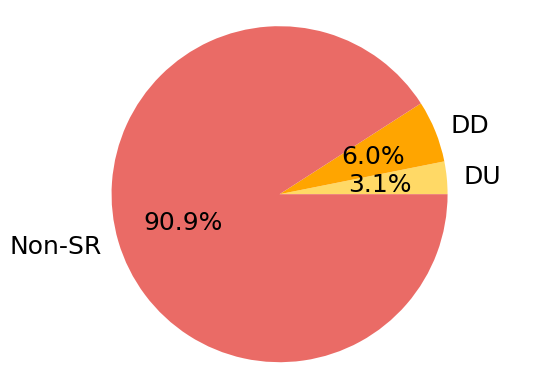

In [9]:
import matplotlib.pyplot as plt

# Data for the pie chart
sizes = [1033, 1967, 30000]
labels = ['DU', 'DD', 'Non-SR']
colors = ['#FFD966', '#FFA500', '#EA6B66']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', textprops={'fontsize': 18})

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

plt.savefig("Fig.2.train_test_1:10.png", dpi=100)
# Display the pie chart
plt.show()